In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("/content/drug200.csv")

In [53]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [54]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [55]:
df.shape

(200, 6)

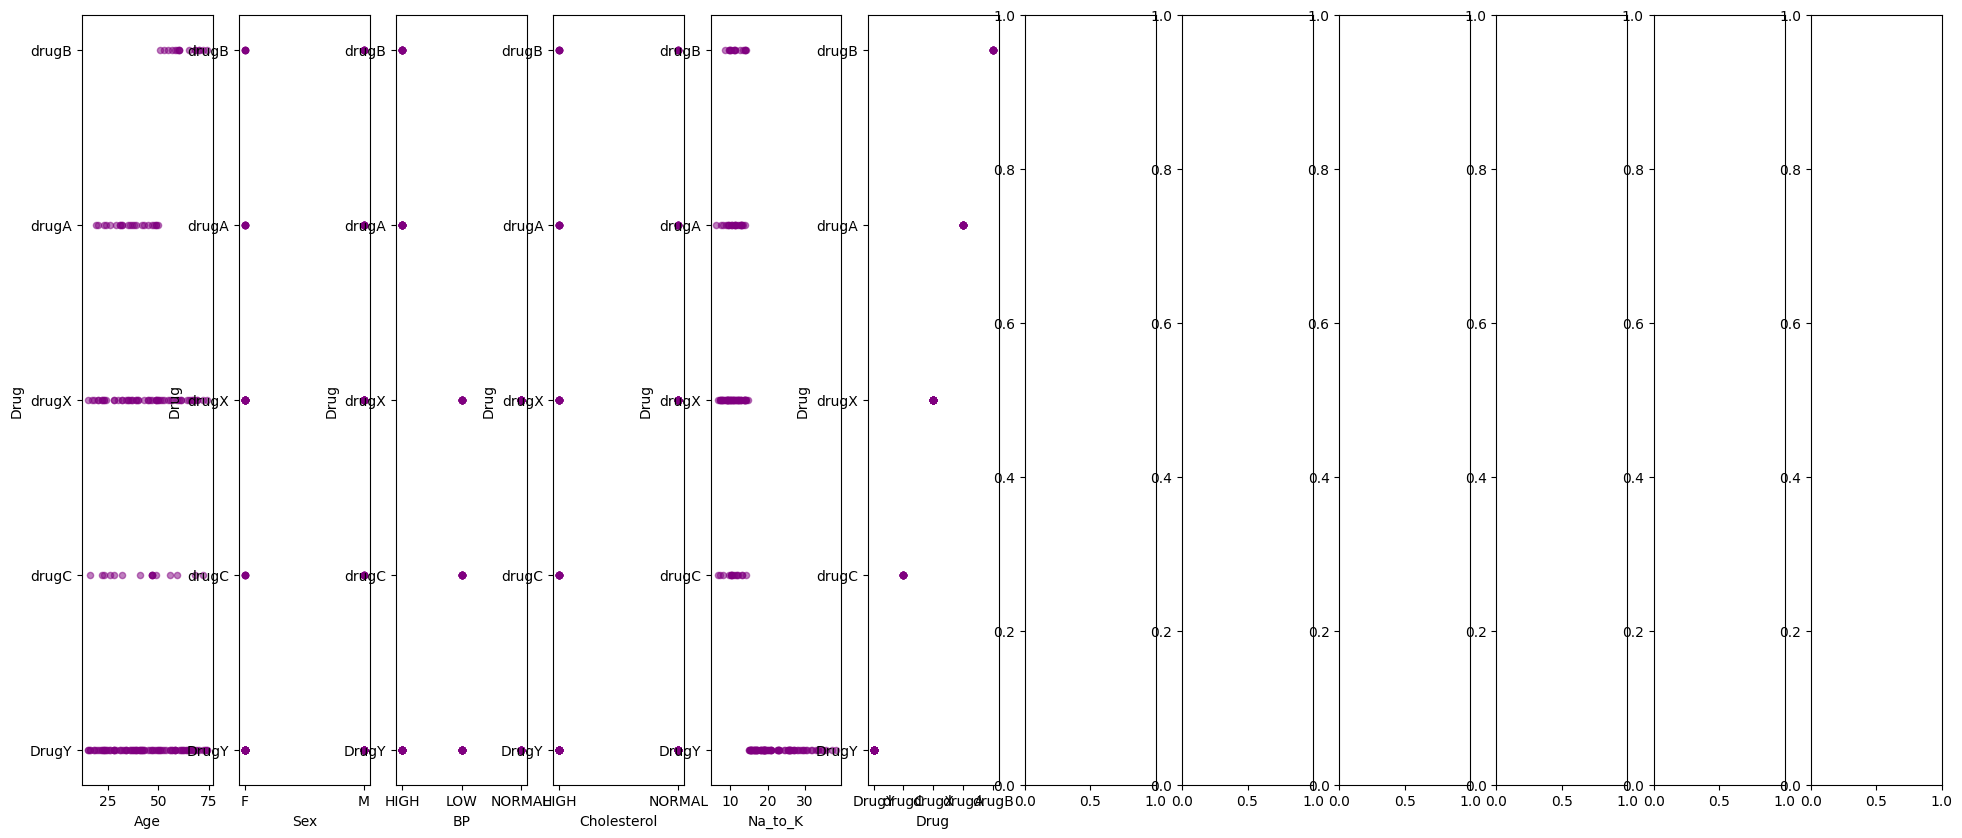

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(24,10))
for xcol, ax in zip(df, axes):
    df.plot(kind='scatter', x=xcol, y='Drug', ax=ax, alpha=0.5, color='purple')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

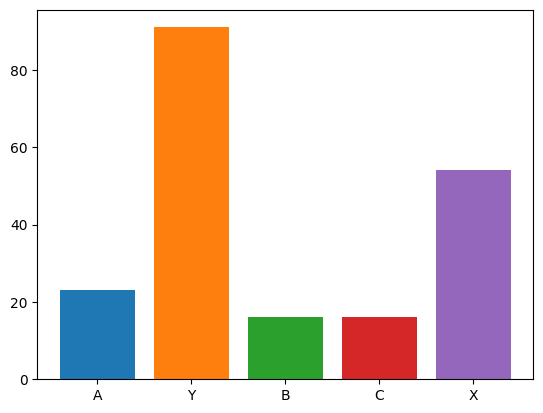

In [57]:
Drugs = df["Drug"].value_counts()
plt.bar("A",Drugs["drugA"])
plt.bar("Y",Drugs["DrugY"])
plt.bar("B",Drugs["drugB"])
plt.bar("C",Drugs["drugC"])
plt.bar("X",Drugs["drugX"])
plt

In [58]:
X = df.drop(columns = "Drug")

In [59]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [60]:
Y = df["Drug"]

In [61]:
Y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [62]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()
for i in X.columns:
  X[i] = le.fit_transform(X[i])
Y = le.fit_transform(Y)

In [67]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train,Y_test = train_test_split(X , Y , random_state = 2 , test_size = 0.2)

In [68]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
137,19,0,0,0,86
163,6,0,0,1,182
111,30,0,2,1,1
123,20,0,2,0,126
109,8,1,2,0,127
...,...,...,...,...,...
43,8,1,2,0,76
22,30,1,1,1,187
72,9,0,2,0,52
15,1,0,0,1,116


In [69]:
X_test

,Age,Sex,BP,Cholesterol,Na_to_K
112,19,1,1,1,23
29,28,1,1,0,132
182,5,0,1,1,70
199,24,0,1,1,66
193,54,1,1,0,2
85,42,1,0,0,98
10,30,0,1,0,71
54,51,0,0,1,44
115,34,1,0,0,134
35,29,1,2,1,4


In [70]:
X_test.shape

(40, 5)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors = 8 , metric = "minkowski" , p=2)
model1.fit(X_train , Y_train)

KNeighborsClassifier(n_neighbors=8)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model2 = RandomForestClassifier()

In [82]:
model2.fit(X_train , Y_train)

RandomForestClassifier()

In [83]:
model1_p = model1.predict(X_test)

In [84]:
model2_p = model2.predict(X_test)

In [85]:
model1_p

array([4, 0, 1, 1, 4, 4, 1, 2, 0, 4, 0, 0, 0, 0, 1, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 3, 0, 0])

In [86]:
model2_p

array([4, 0, 4, 4, 3, 2, 3, 2, 0, 4, 0, 0, 0, 0, 1, 3, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0])

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(Y_test,model2_p)
print("for RandomForest model:" , accuracy)

for RandomForest model: 1.0


In [94]:
confusion_matrix(Y_test, model1_p)

array([[22,  0,  0,  0,  0],
       [ 0,  2,  0,  1,  0],
       [ 0,  0,  1,  0,  2],
       [ 0,  1,  0,  0,  2],
       [ 0,  2,  0,  0,  7]])

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy=accuracy_score(Y_test,model1_p)
print("for KNN model:" , accuracy)

for KNN model: 0.8


In [97]:
import plotly.graph_objects as go
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

mesh_size = .02
margin = 0.25

# Load and split data
X, Y = make_moons(noise=0.3, random_state=0)


# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, Y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)


# Plot the figure
fig = go.Figure(data=[
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale='RdBu'
    )
])
fig.show()

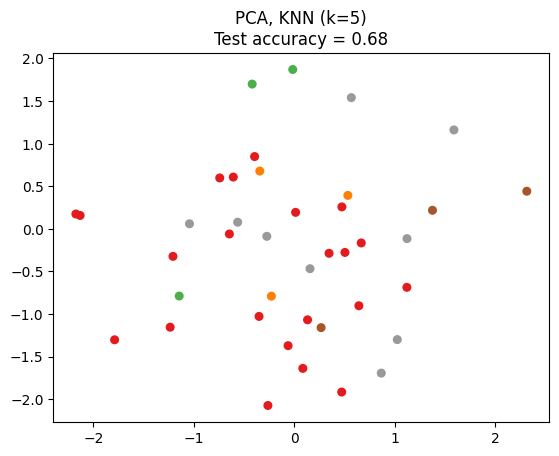

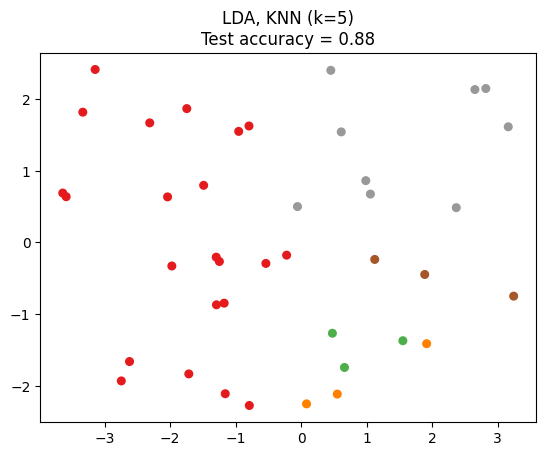

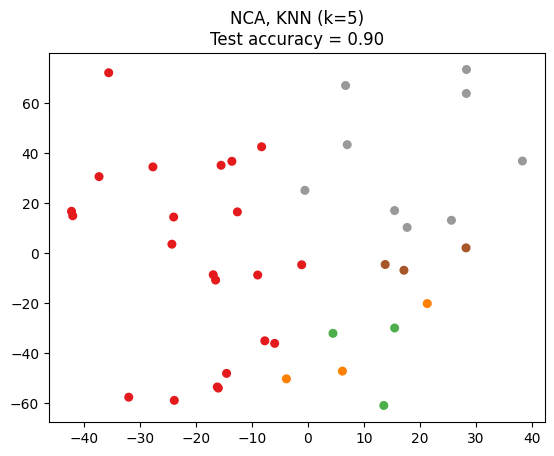

In [117]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 5
random_state = 0

# Load Digits dataset
X, Y = datasets.load_digits(return_X_y=True)


dim = len(X[0])
n_classes = len(np.unique(Y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, Y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), Y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), Y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X_test)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=Y_test, s=30, cmap="Set1")
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()

In [118]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()

In [119]:
model3.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [120]:
model3_p = model3.predict(X_test)

In [121]:
model3_p

array([4, 0, 4, 4, 2, 2, 3, 2, 0, 4, 0, 0, 0, 0, 1, 3, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0])

In [123]:
s = model3.score(X_test , Y_test)

In [124]:
s

0.975

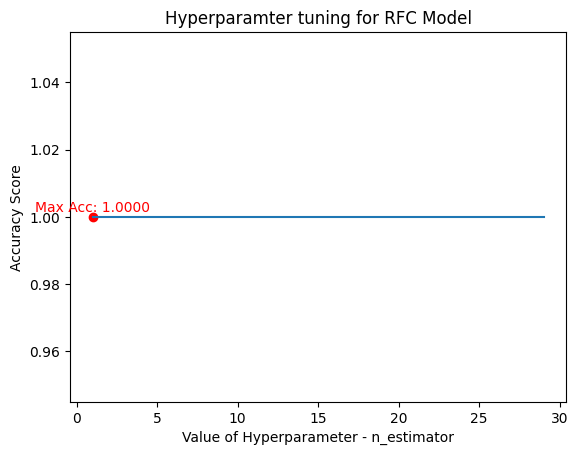

In [132]:
acc_score=[]
n_estimator=[]
for i in range(1,30):
    clf = RandomForestClassifier(n_estimators=i, random_state=42)

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    acc_score.append(accuracy_score(Y_test, model2_p))
    n_estimator.append(i)

# Find the index of the maximum accuracy
max_acc_index = np.argmax(acc_score)
plt.plot(n_estimator,acc_score)
plt.scatter(n_estimator[max_acc_index], acc_score[max_acc_index], color='red', marker='o', label='Peak Value')

# Annotate the peak value
plt.annotate(f'Max Acc: {acc_score[max_acc_index]:.4f}',
             (n_estimator[max_acc_index], acc_score[max_acc_index]),
             textcoords="offset points", xytext=(0, 4),
             ha='center', fontsize=10, color='red')

plt.title("Hyperparamter tuning for RFC Model")
plt.xlabel('Value of Hyperparameter - n_estimator')
plt.ylabel('Accuracy Score')
plt.show()

